# Грузим библиотеки

In [1]:
from flask import Flask
from flask import request
import requests
from flask import make_response
import os
import json
from pandas import DataFrame
import traceback


from methods import access
from methods.emoji import emoji
from methods import telegram_bot_methods
from methods import google_maps_methods
from methods import psql_methods
from methods import reply



import app



if __name__ == "__main__":

    
    app.application.run()



In [2]:
X = {'update_id': 201011794, 'message': {'message_id': 159, 'from': {'id': 84723474, 'first_name': 'Александр', 'last_name': 'Толмачёв', 'language_code': 'ru-RU'}, 'chat': {'id': 84723474, 'first_name': 'Александр', 'last_name': 'Толмачёв', 'type': 'private'}, 'date': 1502611993, 'text': '/help', 'entities': [{'type': 'bot_command', 'offset': 0, 'length': 5}]}}
X['message']['text'] = '/start'
X['message']['chat']['last_name']

'Толмачёв'

In [3]:
#тест отправки графика
import psycopg2
from pandas import DataFrame
import pandas as pd
from datetime import datetime
from datetime import timedelta

import numpy as np

#текущая метка времени
def now_str():
    now = datetime.now()
    now_str = str(now.year)+str(now.month if now.month >= 10 else  '0'+str(now.month))+str(now.day if now.day >= 10 else  '0'+str(now.day)) +' '+str(now.hour if now.hour >= 10 else  '0'+str(now.hour)) + str(now.minute if now.minute >= 10 else  '0'+str(now.minute)) + str(now.second if now.second >= 10 else  '0'+str(now.second))
    return now_str


dbname = 'dbr3jigs1op5oo'
port = '5432'
user = 'muwrkppfuyldmk'
host = 'ec2-54-227-252-202.compute-1.amazonaws.com'
password = '4c4eabfcaf92f7289ccfc1a314d04a3c3806db72b1bf12fd5f0f40c410b14355'

PSQL_heroku_keys = {'dbname' : dbname
                    , 'port' : port
                    , 'user' : user
                    , 'host' : host
                    , 'password' : password
                    }


user_id = 13
command = 'На текущий месяц'
command = ''


conn = psycopg2.connect("dbname='%(dbname)s' port='%(port)s' user='%(user)s' host='%(host)s' password='%(password)s'" % PSQL_heroku_keys)



#формат ответа
response = {'status' : 200
            ,'report' : 'delete_transaction_plan'
            ,'system_message' : 'No report'
            ,'text' : None
            ,'reply_markup' : None
            }

# создаем запрос
cur = conn.cursor()

if command == 'На сегодня':
    cur.execute("select * from public.tasks where  user_id = %(user_id)s and date_task >= date_trunc('day', now()) and date_task < date_trunc('day', now()) +  interval '1 day'" % {  'user_id' : user_id} )
elif command == 'На текущую неделю':
    cur.execute("select * from public.tasks where  user_id = %(user_id)s and date_task >= date_trunc('week', now()) and date_task < date_trunc('week', now()) + interval '7 day'" % {  'user_id' : user_id} )
elif command == 'На текущий месяц':
    cur.execute("select * from public.tasks where  user_id = %(user_id)s and date_task >= date_trunc('month', now()) and date_task < date_trunc('month', now()) + interval '1 month'" % {  'user_id' : user_id} )
else:
    cur.execute("select * from public.tasks where  user_id = %(user_id)s " % {  'user_id' : user_id} )


    
df_plan_tasks = DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description]).sort_values(by='date_task' , ascending=True)

cur.close() 

if df_plan_tasks.shape[0] == 0:
    response['text'] = command + ' дел нет.'
else:
    text = command + ' следующие дела:\n\n'
    num = 1
    for row in df_plan_tasks.iterrows():
        text += str(num) + ': ' + row[1]['task'] + ' ' + row[1]['date_task'].strftime('%d.%m.%Y') + '\n'
        num += 1
        
        
    response['text'] = text
    


print ('ok')


df_plan_tasks

ok


,id,user_id,family_id,task,date_task,flg_done
1,2,13,None,Позвонить папе по поводу лоджии,2017-09-24,False
3,4,13,None,тестовые дела,2017-09-26,False
4,5,13,None,Позвонить Николаю узнать контакты Виталия,2017-09-26,False
5,6,13,None,Грише документы отправить,2017-09-26,False
6,7,13,None,Позвонить секретарю в суд о предварительном ре...,2017-09-26,False
7,8,13,None,Изучить ошибки у Марины в боте,2017-09-27,False
8,9,13,None,Составить хадатайство для суда.,2017-09-27,False
0,1,13,None,Планируем ли дела делишечки?,2017-10-01,False
11,12,13,None,Встреча с Шестаковым в 16:00,2017-10-02,False
12,13,13,None,Скопировать видео сми,2017-10-02,False


In [4]:
text = command + ' следующие дела:\n\n'
num = 1
for row in df_plan_tasks.iterrows():
    text += str(num) + ': ' + row[1]['task'] + ' ' + row[1]['date_task'].strftime('%d.%m.%Y') + '\n'

    num += 1


In [5]:
print (text)

 следующие дела:

1: Позвонить папе по поводу лоджии 24.09.2017
2: тестовые дела 26.09.2017
3: Позвонить Николаю узнать контакты Виталия 26.09.2017
4: Грише документы отправить 26.09.2017
5: Позвонить секретарю в суд о предварительном решении 26.09.2017
6: Изучить ошибки у Марины в боте 27.09.2017
7: Составить хадатайство для суда. 27.09.2017
8: Планируем ли дела делишечки? 01.10.2017
9: Встреча с Шестаковым в 16:00 02.10.2017
10: Скопировать видео сми 02.10.2017
11: Распечатать все документы для фас 02.10.2017
12: встреча с прокурором подгайным 3.10.2017 в 14:00 03.10.2017
13: Направить в прокуратуру результаты технической экспертизы 04.10.2017
14: Позвонить журналисту Максиму в 15:10 04.10.2017
15: Беседа с Константином Воронцовым про data science и за жизнь
https://www.youtube.com/watch?v=DR3mgnEKRgI&feature=youtu.be 05.10.2017
16: Оплатить договор центр эксперт 05.10.2017
17: Напомнить Сергею про FinMachine 07.10.2017
18: Доделать дела 10.10.2017
19: Выбрать билеты и т.д. для finma

In [6]:
df_plan_tasks['date_task'].dt.strftime('%d.%m.%Y')

1      24.09.2017
3      26.09.2017
4      26.09.2017
5      26.09.2017
6      26.09.2017
7      27.09.2017
8      27.09.2017
0      01.10.2017
11     02.10.2017
12     02.10.2017
13     02.10.2017
10     03.10.2017
17     04.10.2017
15     04.10.2017
19     05.10.2017
18     05.10.2017
9      07.10.2017
2      10.10.2017
20     10.10.2017
16     11.10.2017
21     11.10.2017
14     15.10.2017
22     15.10.2017
26     24.10.2017
24     25.10.2017
25     28.10.2017
29     28.10.2017
30     29.10.2017
31     31.10.2017
27     01.11.2017
          ...    
291    04.07.2018
292    04.07.2018
288    04.07.2018
289    04.07.2018
294    05.07.2018
295    05.07.2018
297    06.07.2018
299    06.07.2018
296    07.07.2018
298    07.07.2018
300    08.07.2018
305    09.07.2018
304    09.07.2018
301    09.07.2018
302    09.07.2018
303    09.07.2018
306    11.07.2018
307    11.07.2018
308    11.07.2018
309    12.07.2018
310    12.07.2018
311    12.07.2018
312    12.07.2018
313    12.07.2018
315    12.

# make some graphics

In [7]:


df_plan_tasks['YearMonth'] = pd.to_datetime(df_plan_tasks['date_task']).map(lambda dt: dt.replace(day=1))

res = df_plan_tasks.groupby(['YearMonth'])['id'].count()
res_6 = res.sort_index(ascending = False).head(6).sort_index(ascending = True)

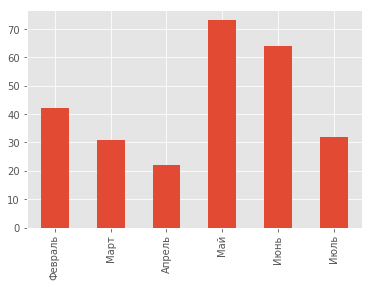

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

month_dict= {1:'Январь',
            2:'Февраль',
            3:'Март',
            4:'Апрель',
            5:'Май',
            6:'Июнь',
            7:'Июль',
            8:'Август',
            9:'Сентябрь',
            10:'Октябрь',
            11:'Ноябрь',
            12:'Декабрь'}


res_6.index = [month_dict[x.month] for x in list(res_6.index)]

res_6.plot(kind='bar' )



In [9]:
#номер недели
datetime.date(df_plan_tasks['date_task'][1]).isocalendar()[1]

#сделать - по неделям разбить месяц и как в течение месяца делались дела, сравнивать с средним значением по месяцам
#в конце месяца отчетик по тому, как нагружаешь себя и как выполняешь задачи, как прокачиваешься

38

In [10]:
#отчет по делам по итогам месяца
#соираем информацию о проделанных делах
#хотим показать - по загрузке по неделям как дела ставили - сравнение с среднестатистической загрузкой нашей понедельной.
#рекомендации и похвалы по итогу сравнения. 
#Смотреть самые популярные темы по итогу месяца какие дела себе ставил по итогу сематического анализа
from dateutil.relativedelta import relativedelta
now_date = datetime.now()
next_date = datetime.now()+ relativedelta(months=1)
prev_date = datetime.now()- relativedelta(months=1)


now_year = now_date.year
now_month = now_date.month

prev_year = prev_date.year
prev_month = prev_date.month

datetime(now_year, now_month , 1).isocalendar()[1]



26

In [35]:


df_prev_month = df_plan_tasks[(df_plan_tasks['date_task'] >= datetime(prev_year, prev_month , 1))
             & (df_plan_tasks['date_task'] < datetime(now_year, now_month , 1))][:]

df_prev_month['n_week'] = [int(x.day / 7) + 1 for x in df_prev_month['date_task']]

res = df_prev_month.groupby(['n_week'])['id'].count()

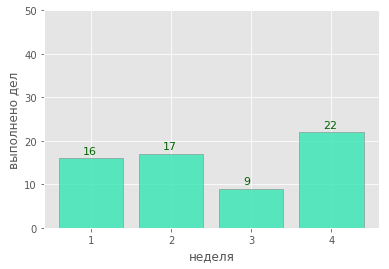

In [42]:

cnt_missions = res.values
name_bars = list(res.index)
y_pos = np.arange(len(name_bars))


plt.bar(y_pos, cnt_missions, color = (0.2, 0.9, 0.7, 0.8) ,  edgecolor='gray')



plt.xlabel('неделя')
plt.ylabel('выполнено дел')


plt.ylim(0,50)


plt.xticks(y_pos, name_bars)

for a,b in zip(y_pos, cnt_missions): 
    plt.text(a - 0.1, b + 1, str(b) , fontsize=11 , color = 'darkgreen')


plt.savefig('to1.png' ,facecolor='w', edgecolor='w')

plt.show()



In [16]:
from PIL import Image, ImageDraw
image = Image.open('to1.png')
image.show()

#для отправки в телеграме 
x = open('to1.png', 'rb')


bot.send_photo(chat_id=chat_id, photo=open('tests/test.png', 'rb'))


PermissionError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'to1.png'

In [29]:
import os
os.remove("to2.png")


In [41]:
plt.savefig('to2.png' ,facecolor='w', edgecolor='w')
x = open('to2.png', 'rb')
x.close()
#os.remove("to2.png")
